<a href="https://www.kaggle.com/code/elnahas/nasa-nearest-earth-objects?scriptVersionId=143065807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NASA & Nearest Earth Objects

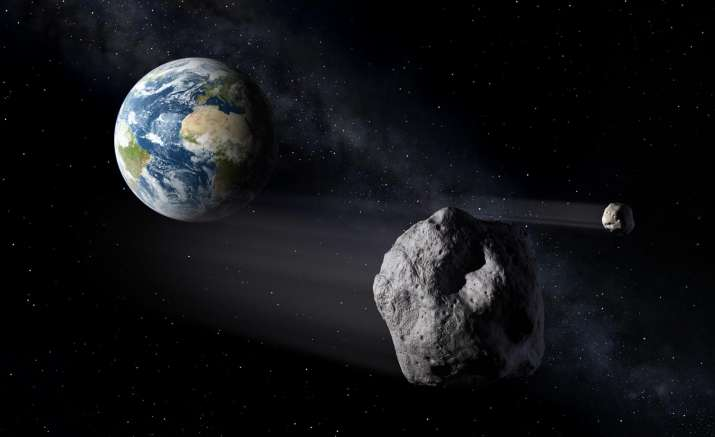

### NASA & Nearest Earth Objects

* Load dataset
* Inspecting the dataset
* Preprocessing the data
* Preprocessing & Data Viz
* Splitting the dataset into train and test sets
* Fitting and Making predictions XG Boost Model
* Fitting and Making predictions KNN Model
* Fitting and Making predictions RandomForst Model
* Fitting and Making predictions Gaussian Naive Bayes Model
* Fitting and Making predictions DecisionTree Model
* Fitting and Making predictions Display all models
* Making predictions and evaluating performance
* Display all models







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#### Load dataset 

In [ ]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

#### Inspecting the dataset

In [ ]:
# Instpect Data 
df.shape

In [ ]:
df.head()

In [ ]:
# check null values
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask = mask ,annot=True)

#### Preprocessing & Data Viz

In [ ]:
# remove those two columns
df = df.drop(['orbiting_body','sentry_object'], axis=1)
df


In [ ]:
# plot distribution of Hazardous
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

In [ ]:
# Separate Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

In [ ]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(df[numeric_df])

In [ ]:
# create pairplot To plot multiple pairwise bivariate distributions with hazardous
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

In [ ]:
for k in numeric_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

### Splitting the dataset into train and test sets

In [ ]:
# Split into x and y ,Irrelevant features dropped
x = df.drop(["id","name",'est_diameter_max',"est_diameter_max",'hazardous',"miss_distance","absolute_magnitude"] , axis = 1)


In [ ]:
# Hazardous Transformed into int
y = df.hazardous.astype("int")
print(x.shape, y.shape)

In [ ]:
# Train & Test Splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Models

In [ ]:
# XG Boost Model
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
XGBC_pred = XGBC.predict(X_test)
Acc_XGBC = round(accuracy_score(XGBC_pred, y_test) * 100,2)
print(Acc_XGBC)

In [ ]:
# KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
Acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print(Acc_KNN)

In [ ]:
# RandomForst Model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
Acc_RF = round(accuracy_score(RF_pred, y_test) * 100, 2)
print(Acc_RF)

In [ ]:
# Gaussian Naive Bayes Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
Acc_GNB = round(accuracy_score(GNB_pred,y_test) * 100, 2)
print(Acc_GNB)

In [ ]:
# DecisionTree Model

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
Acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(Acc_DTC)

### Display all models 

In [ ]:
# Print all models

models = pd.DataFrame({
    'Model': ['Random Forest', 'XG Boost', 'Gaussian Naive Bayes', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [Acc_RF, Acc_XGBC, Acc_GNB, 
              Acc_KNN, Acc_DTC]})
models.sort_values(by='Score', ascending=False)